In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
# rename path
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [3]:
!ls /mydrive/Data_Science_Projects/Customer_Clustering/data

segmentation_data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = '/mydrive/Data_Science_Projects/Customer_Clustering/data/'

df = pd.read_csv(path + 'segmentation_data.csv')
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [6]:
df.shape

(2000, 8)

In [7]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Separate & zipping dataset

In [8]:
Age = df['Age'].values
Savings = df['Income'].values
X = np.array(list(zip(Age, Savings)))
X

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]])

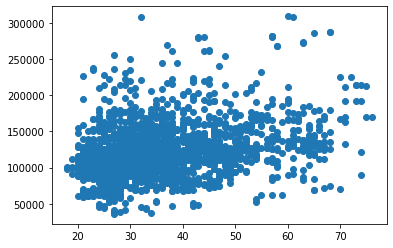

In [9]:
plt.scatter(Age, Savings)

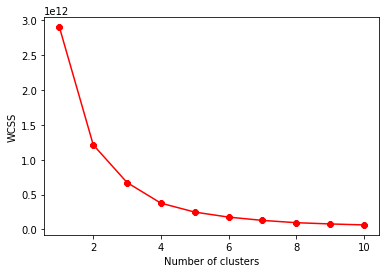

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=10)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, color='red', marker="8")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


## To apply the K-means  with k=4




In [11]:
model = KMeans(n_clusters=4, random_state=10)
Y_means = model.fit_predict(X)

## Vizalizing the cluster

- Cluster 1:  Customers with medium income and low spend
- Cluster 2:  Customers with high income and midum to high spend
- Cluster 3:  Customers with low income
- Cluster 4:  Customers with medium income and high spend

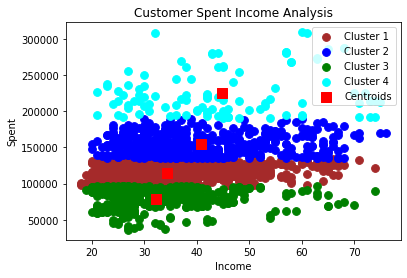

In [12]:
plt.scatter(X[Y_means== 0,0], X[Y_means==0,1], s=60, c='brown', label="Cluster 1")
plt.scatter(X[Y_means== 1,0], X[Y_means==1,1], s=60, c='blue', label="Cluster 2")
plt.scatter(X[Y_means== 2,0], X[Y_means==2,1], s=60, c='green', label="Cluster 3")
plt.scatter(X[Y_means== 3,0], X[Y_means==3,1], s=60, c='cyan', label="Cluster 4")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, marker='s', c='red', label="Centroids")
plt.title("Customer Spent Income Analysis")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.legend()
plt.show()